In [108]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Dara files loaded, provided by instructor 
file_to_load_1 = "city_data.csv"
file_to_load_2 = "ride_data.csv"

# Read city and ride, then store into Pandas data frame
city_data_df = pd.read_csv(file_to_load_1)
ride_data_df = pd.read_csv(file_to_load_2)

In [109]:
# check city data
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [110]:
# check ride data
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2018 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2018 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2018 23:22,23.44,5.149250e+12
4,South Jack,3/6/2018 4:28,34.58,3.908450e+12


In [111]:
# Combine the two data frame files using the merge function.  Set city as an inner (intersection key from both frames.
combo_data_df = city_data_df.merge(ride_data_df, on = "city", )
combo_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2/24/2018 8:40,13.93,5.628550e+12
1,Richardfort,38,Urban,2/13/2018 12:46,14.00,9.100500e+11
2,Richardfort,38,Urban,2/16/2018 13:52,17.92,8.206390e+11
3,Richardfort,38,Urban,2/1/2018 20:18,10.26,9.554940e+12
4,Richardfort,38,Urban,4/17/2018 2:26,23.00,7.200210e+11


In [112]:
# Separated the types of data by creating a new data frame and grouped by city - thsi case Urban
Urban = combo_data_df[combo_data_df.type == "Urban"].groupby("city")
# Urban.head()

In [113]:
Urban_rides=Urban["ride_id"].nunique()
Urban_driver=Urban["driver_count"].sum()
Urban_fare=Urban["fare"].mean()
# Urban_fare.head()
Urban_driver.head()
# Urban_fare.head()

city
Amandaburgh         216
Barajasview         572
Carriemouth        1404
Christopherfurt    1107
Deanville           931
Name: driver_count, dtype: int64

In [114]:
# Separated the types of data by creating a new data frame and grouped by city - thsi case Suburban
Suburban = combo_data_df[combo_data_df.type == "Suburban"].groupby("city")
# Suburban.head()

In [115]:
Suburban_rides=Suburban["ride_id"].nunique()
Suburban_driver=Suburban["driver_count"].sum()
Suburban_fare=Suburban["fare"].mean()
# Suburban_rides.head()
# Suburban_driver.head()
# Suburban_fare.head()

In [116]:
# Separated the types of data by creating a new data frame and grouped by city - thsi case Rural
Rural = combo_data_df[combo_data_df.type == "Rural"].groupby("city")
# Suburban.head()

In [117]:
Rural_rides=Rural["ride_id"].nunique()
Rural_driver=Rural["driver_count"].sum()
Rural_fare=Rural["fare"].mean()
# Rural_rides.head()
# Rural_driver.head()
# Rural_fare.head()

# Pie Chart Variables
Total_Rural_Fare=Rural["fare"].sum()
# Total_Rural_Fare.sum()
Total_Rural_rides=Rural["ride_id"].count()
# Total_Rural_rides.sum()
Total_Rural_driver=Rural["driver_count"].count()
Total_Rural_driver.sum()

125

In [118]:
# Get mean fares per city by grouping city and fares
Total_fare_per_city=combo_data_df.groupby("city")["fare"].sum()
Total_Fare=Total_fare_per_city.sum()
Total_Fare

63538.64

In [119]:
#list out the variables listed above for easy reference.
# x_axis=Ave_fare_per_city
# y_axis=Rides_per_city
# drivers=Total_drivers_per_city

# Urban_rides
# Urban_fare
# Urban_driver

# Suburban_rides
# Suburban_fare
# Suburban_driver

# Rural_rides
# Rural_fare
# Rural_driver

## Bubble Plot of Ride Sharing Data

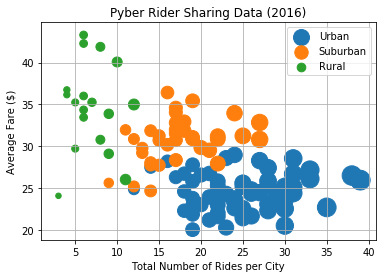

In [120]:
# Scatter plot of a.) Average Fare ($) Per City (y-axis) 
    # b.) Total Number of Rides Per City (x-axix0, 
    # c.) # Total Number of Drivers Per City (bubble size),and 
    # d.) City Type (sort by Urban, Suburban, Rural) 
    
Urban_Plot=plt.scatter(Urban_rides, Urban_fare, s=Urban_rides*10, marker="o")
Suburban_Plot=plt.scatter(Suburban_rides, Suburban_fare, s=Suburban_rides*10, marker="o")
Rural_Plot=plt.scatter(Rural_rides, Rural_fare, s=Rural_rides*10, marker="o")

# Formating of scatter plot
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare ($)")
plt.grid()
plt.title("Pyber Rider Sharing Data (2016)")
legend=plt.legend(["Urban", "Suburban", "Rural"] ,loc=1)

plt.show()
plt.text=(50,50,"Note")
plt.text=(50,50,"Circle size correlates with drive count in city")

## Total Fares by City Type

In [121]:
# Pie Chart Variables for Urban
Total_Urban_Fare=Urban["fare"].sum()
Total_Urban_rides=Urban["ride_id"].count()
Total_Urban_driver=Urban["driver_count"].count()

# Total_Urban_Fare.sum()
# Total_Urban_rides.sum()
# Total_Urban_driver.sum()

In [122]:
# Pie Chart Variables for Suburban
Total_Suburban_Fare=Suburban["fare"].sum()
Total_Suburban_rides=Suburban["ride_id"].count()
Total_Suburban_driver=Suburban["driver_count"].count()

# Total_Suburban_Fare.sum()
# Total_Suburban_rides.sum()
# Total_Suburban_driver.sum()

In [123]:
# Pie Chart Variables for Rural 
Total_Rural_Fare=Rural["fare"].sum()
Total_Rural_rides=Rural["ride_id"].count()
Total_Rural_driver=Rural["driver_count"].count()

# Total_Rural_Fare.sum()
# Total_Rural_rides.sum()
# Total_Rural_driver.sum()

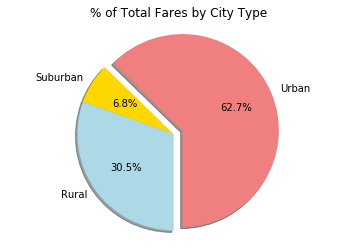

In [124]:
# Total Fares by City Type

# Variables
labels = 'Urban', 'Suburban', 'Rural'
sizes = [Total_Urban_Fare.sum(),Total_Rural_Fare.sum(),Total_Suburban_Fare.sum()]
colors = ["lightcoral","gold","lightblue"]
explode = (0.1, 0, 0)  # only "explode" the 1st slice (i.e. 'Urban')

# Plot Function
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("% of Total Fares by City Type")

# Save an image of our chart and print the final product to the screen
plt.savefig("Total_Fares_by_City_TypePyPies.png")
plt.show()

## Total Rides by City Type

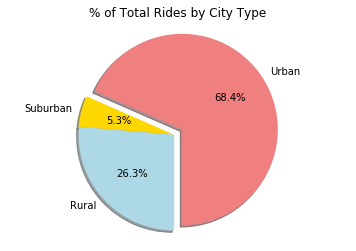

In [125]:
# Total Rides by City Type

# Variables
labels = 'Urban', 'Suburban', 'Rural'
sizes = [Total_Urban_rides.sum(),Total_Rural_rides.sum(),Total_Suburban_rides.sum()]
colors = ["lightcoral","gold","lightblue"]
explode = (0.1, 0, 0)  # only "explode" the 1st slice (i.e. 'Urban')

# Plot Function
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save an image of our chart and print the final product to the screen
plt.savefig("Total_Rides_by_City_TypePyPies.png")
plt.show()


## Total Drivers by City Type

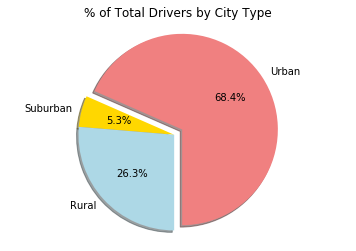

In [126]:
# Variables
labels = 'Urban', 'Suburban', 'Rural'
sizes = [Total_Urban_driver.sum(),Total_Rural_driver.sum(),Total_Suburban_driver.sum()]
colors = ["lightcoral","gold","lightblue"]
explode = (0.1, 0, 0)  # only "explode" the 1st slice (i.e. 'Urban')

# Plot Function
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("% of Total Drivers by City Type")

# Save an image of our chart and print the final product to the screen
plt.savefig("Total_Drives_by_City_TypePyPies.png")
plt.show()